In [1]:
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='latin-1')

In [2]:
data.describe()

,order_date,order_hour,delivery_fee,food_price,cooking_time_in_seconds,delivery_time_in_seconds,restaurant_id,nb_menu_items
count,236142.000000,236142.000000,236142.000000,236142.000000,210176.000000,215338.000000,236142.000000,230337.000000
mean,212.946994,14.544892,16.205973,196.778639,782.585585,541.573563,98.985221,85.563557
std,106.790041,4.085919,30.912053,206.840366,612.569108,496.373077,52.467492,82.752999
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,122.000000,11.000000,0.000000,80.000000,468.000000,317.000000,55.000000,34.000000
50%,228.000000,14.000000,10.000000,138.000000,681.000000,468.000000,104.000000,61.000000
75%,310.000000,18.000000,15.000000,230.000000,980.000000,671.000000,142.000000,106.000000
max,365.000000,23.000000,1182.000000,7001.000000,156541.000000,101097.000000,200.000000,969.000000


In [3]:
data

,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,delivery_time_in_seconds,restaurant_id,restaurant_category,restaurant_type,province,nb_menu_items
0,1,Monday,12,COMPLETED,CASH,NO COUPON,10.0,100.0,424.0,691.0,63,Rice Dish,NON-CHAIN,Nakhon Pathom,14.0
1,1,Monday,11,COMPLETED,CASH,COUPON USED,75.0,0.0,NaN,285.0,70,Rice Dish,CHAIN_RESTAURANT,Bangkok,66.0
2,1,Monday,9,COMPLETED,CASH,NO COUPON,0.0,130.0,345.0,602.0,106,Delivery Only,NON-CHAIN,Bangkok,15.0
3,1,Monday,18,COMPLETED,CASH,NO COUPON,20.0,80.0,710.0,367.0,27,Street Food/Food Stands,NON-CHAIN,Samut Sakhon,14.0
4,1,Monday,8,COMPLETED,CASH,NO COUPON,10.0,60.0,659.0,717.0,63,Rice Dish,NON-CHAIN,Nakhon Pathom,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236137,365,Monday,15,COMPLETED,CASH,COUPON USED,137.0,960.0,1464.0,1403.0,26,Thai,NON-CHAIN,Bangkok,179.0
236138,365,Monday,14,COMPLETED,CASH,COUPON USED,0.0,50.0,207.0,401.0,85,Street Food/Food Stands,NON-CHAIN,Bangkok,8.0
236139,365,Monday,17,COMPLETED,CASH,COUPON USED,25.0,326.0,926.0,658.0,40,Steak House/Barbeque,NON-CHAIN,Nonthaburi,119.0
236140,365,Monday,17,COMPLETED,CASH,COUPON USED,0.0,240.0,709.0,497.0,185,North East,NON-CHAIN,Bangkok,41.0


In [4]:
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

sns.set_theme(style="whitegrid", palette="pastel")
#defining the library
profile = ProfileReport(data)
# exporting your report as a html file
profile.to_file(output_file='report_1.html')

/Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Summarize dataset:  70%|███████   | 19/27 [00:05<00:02,  3.22it/s, Calculate kendall correlation]             /Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Summarize dataset:  78%|███████▊  | 21/27 [00:06<00:02,  2.29it/s, Calculate phi_k correlation]  /Users/pondspective/opt/

In [5]:
zero_price = data[data['food_price'] == 0]
zero_delivery_time = data[data['delivery_time_in_seconds'] == 0]

In [6]:
res_categ = data.groupby('restaurant_category').count()['order_date'].sort_values(ascending=False).to_frame()

In [7]:
res_categ.to_csv('res_categ.csv')

In [8]:
data.groupby(['order_date','order_hour']).agg({'delivery_status':'count','nb_menu_items':'sum', 'restaurant_id': pd.Series.nunique})

delivery_status  nb_menu_items  restaurant_id
order_date order_hour                                               
1          7                         2          120.0              2
           8                        10          281.0              7
           9                        11          263.0              9
           10                       23         1869.0             15
           11                       52         3361.0             31
...                                ...            ...            ...
365        18                      100         9283.0             50
           19                      100         9507.0             50
           20                       64         4983.0             32
           21                       42         3839.0             24
           22                       22         1957.0             12

[7246 rows x 3 columns]

In [9]:
import numpy as np

distinct_restaurant = np.unique(data[['restaurant_id','nb_menu_items']], axis=0)
num_menu = pd.DataFrame(distinct_restaurant, columns = ['restaurant_id','nb_menu_items'])
num_menu.dropna(inplace=True)
num_menu.describe()

,restaurant_id,nb_menu_items
count,197.000000,197.000000
mean,99.746193,71.065990
std,57.905152,90.212961
min,1.000000,1.000000
25%,50.000000,21.000000
50%,99.000000,49.000000
75%,149.000000,90.000000
max,200.000000,969.000000


<AxesSubplot:xlabel='nb_menu_items', ylabel='Count'>

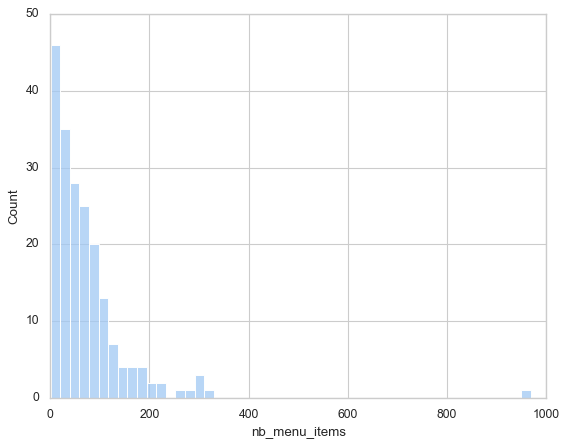

In [10]:
# %pip install matplotlib
import matplotlib.pyplot as plt 
# sns.set_theme(style="whitegrid", palette="pastel")
sns.histplot(num_menu, x="nb_menu_items", bins=50)

# counts, bins = np.histogram(num_menu['nb_menu_items'])
# plt.stairs(counts, bins)

# Approach & Action Items

1. Encoding date of week to number
2. Categorize resturant size by number of menu (compare performance with using nb_menu_items only)
    - L : > 100
    - M : 50 - 200
    - S : < 50

3. Drop delivery status not completed and food price = 0 without coupon used
4. Categorize resturant type 
    - Doing one hot encoding choose only top 5 category.
    - Main dish / Dessert / Mid day meal

In [11]:
# 1. Encoding Week to number

dow_number_map = {
    'Sunday':0,
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6
}

data['dow'] = data['order_day_of_week'].apply(lambda x: dow_number_map[x])

data.sample(30)

,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,delivery_time_in_seconds,restaurant_id,restaurant_category,restaurant_type,province,nb_menu_items,dow
206757,339,Wednesday,11,COMPLETED,RLP,COUPON USED,25.0,344.0,803.0,874.0,43,Steak House/Barbeque,CHAIN_RESTAURANT,Bangkok,61.0,3
190800,324,Tuesday,11,COMPLETED,CASH,COUPON USED,20.0,60.0,667.0,368.0,187,Southern Food,NON-CHAIN,Samut Prakan,96.0,2
111371,217,Sunday,20,COMPLETED,CASH,COUPON USED,15.0,397.0,705.0,468.0,174,Dessert,NON-CHAIN,Bangkok,308.0,0
993,3,Wednesday,14,COMPLETED,CASH,NO COUPON,0.0,70.0,428.0,300.0,88,Juice/Coffee/Tea/Soft drinks,NON-CHAIN,Samut Sakhon,114.0,3
11525,28,Sunday,20,COMPLETED,CASH,NO COUPON,10.0,110.0,536.0,423.0,129,À La Carte,NON-CHAIN,Bangkok,118.0,0
124407,239,Monday,17,COMPLETED,CASH,COUPON USED,15.0,160.0,497.0,440.0,83,Seafood,NON-CHAIN,Pathum Thani,26.0,1
77542,152,Friday,14,CANCELED_BY_RESTAURANT,CASH,COUPON USED,0.0,235.0,NaN,NaN,31,Bubble Milk Tea,CHAIN_RESTAURANT,Bangkok,60.0,5
99673,196,Sunday,16,COMPLETED,CASH,COUPON USED,123.0,0.0,NaN,969.0,78,Noodles,NON-CHAIN,Bangkok,93.0,0
80275,156,Tuesday,8,COMPLETED,CASH,COUPON USED,20.0,90.0,839.0,745.0,147,Bubble Milk Tea,NON-CHAIN,Samut Sakhon,82.0,2
100933,198,Tuesday,20,COMPLETED,LINEMAN_CREDIT_CARD,COUPON USED,0.0,65.0,290.0,221.0,48,À La Carte,NON-CHAIN,Bangkok,258.0,2


In [12]:
data['is_coupon_used'] = data['coupon_usage'].apply(lambda x: 1 if x == 'COUPON USED' else 0)
data['is_bkk'] = data['province'].apply(lambda x: 1 if x == 'Bangkok' else 0)
data['is_chain_res'] = data['restaurant_type'].apply(lambda x: 1 if x == 'CHAIN_RESTAURANT' else 0)

In [13]:
def get_resturant_size(nb_menu):
    if nb_menu == None:
        return 'M'
    elif nb_menu <= 50:
        return 'S'
    elif nb_menu <= 100:
        return 'M'
    else:
        return 'L'

data['resturant_size'] = data['nb_menu_items'].apply(get_resturant_size)


In [14]:
data.groupby(['resturant_size']).count()['order_date']

resturant_size
L    73006
M    68508
S    94628
Name: order_date, dtype: int64

In [15]:
resturant_label = pd.read_csv('res_categ_labeled.csv')
resturant_label = resturant_label[['restaurant_category','is_main_dish']]
join_data = pd.merge(data, resturant_label, on='restaurant_category', how='left')
payment_ohc = pd.get_dummies(data['payment_method'])
join_data = pd.merge(join_data, payment_ohc, left_index = True, right_index = True)
res_size_ohc = pd.get_dummies(data['resturant_size'])
join_data = pd.merge(join_data, res_size_ohc, left_index = True, right_index = True)
join_data

,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,delivery_time_in_seconds,...,is_bkk,is_chain_res,resturant_size,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S
0,1,Monday,12,COMPLETED,CASH,NO COUPON,10.0,100.0,424.0,691.0,...,0,0,S,1,1,0,0,0,0,1
1,1,Monday,11,COMPLETED,CASH,COUPON USED,75.0,0.0,NaN,285.0,...,1,1,M,1,1,0,0,0,1,0
2,1,Monday,9,COMPLETED,CASH,NO COUPON,0.0,130.0,345.0,602.0,...,1,0,S,1,1,0,0,0,0,1
3,1,Monday,18,COMPLETED,CASH,NO COUPON,20.0,80.0,710.0,367.0,...,0,0,S,0,1,0,0,0,0,1
4,1,Monday,8,COMPLETED,CASH,NO COUPON,10.0,60.0,659.0,717.0,...,0,0,S,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236137,365,Monday,15,COMPLETED,CASH,COUPON USED,137.0,960.0,1464.0,1403.0,...,1,0,L,1,1,0,0,1,0,0
236138,365,Monday,14,COMPLETED,CASH,COUPON USED,0.0,50.0,207.0,401.0,...,1,0,S,0,1,0,0,0,0,1
236139,365,Monday,17,COMPLETED,CASH,COUPON USED,25.0,326.0,926.0,658.0,...,0,0,L,1,1,0,0,1,0,0
236140,365,Monday,17,COMPLETED,CASH,COUPON USED,0.0,240.0,709.0,497.0,...,1,0,S,1,1,0,0,0,0,1


In [16]:
cleaned_df = join_data[join_data['delivery_status'] == 'COMPLETED']
print(f"Choose delivery status complete => {cleaned_df.shape}")
cleaned_df = cleaned_df[~((cleaned_df['food_price'] == 0) & (cleaned_df['is_coupon_used'] == 0))]
print(f"Filter out zero food price without using coupon => {cleaned_df.shape}")
cleaned_df

Choose delivery status complete => (215367, 27)
Filter out zero food price without using coupon => (213807, 27)


,order_date,order_day_of_week,order_hour,delivery_status,payment_method,coupon_usage,delivery_fee,food_price,cooking_time_in_seconds,delivery_time_in_seconds,...,is_bkk,is_chain_res,resturant_size,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S
0,1,Monday,12,COMPLETED,CASH,NO COUPON,10.0,100.0,424.0,691.0,...,0,0,S,1,1,0,0,0,0,1
1,1,Monday,11,COMPLETED,CASH,COUPON USED,75.0,0.0,NaN,285.0,...,1,1,M,1,1,0,0,0,1,0
2,1,Monday,9,COMPLETED,CASH,NO COUPON,0.0,130.0,345.0,602.0,...,1,0,S,1,1,0,0,0,0,1
3,1,Monday,18,COMPLETED,CASH,NO COUPON,20.0,80.0,710.0,367.0,...,0,0,S,0,1,0,0,0,0,1
4,1,Monday,8,COMPLETED,CASH,NO COUPON,10.0,60.0,659.0,717.0,...,0,0,S,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236137,365,Monday,15,COMPLETED,CASH,COUPON USED,137.0,960.0,1464.0,1403.0,...,1,0,L,1,1,0,0,1,0,0
236138,365,Monday,14,COMPLETED,CASH,COUPON USED,0.0,50.0,207.0,401.0,...,1,0,S,0,1,0,0,0,0,1
236139,365,Monday,17,COMPLETED,CASH,COUPON USED,25.0,326.0,926.0,658.0,...,0,0,L,1,1,0,0,1,0,0
236140,365,Monday,17,COMPLETED,CASH,COUPON USED,0.0,240.0,709.0,497.0,...,1,0,S,1,1,0,0,0,0,1


In [17]:
cleaned_df.isna().sum()

order_date                     0
order_day_of_week              0
order_hour                     0
delivery_status                0
payment_method                 0
coupon_usage                   0
delivery_fee                   0
food_price                     0
cooking_time_in_seconds     3864
delivery_time_in_seconds     120
restaurant_id                  0
restaurant_category            0
restaurant_type                0
province                       0
nb_menu_items               5492
dow                            0
is_coupon_used                 0
is_bkk                         0
is_chain_res                   0
resturant_size                 0
is_main_dish                   0
CASH                           0
LINEMAN_CREDIT_CARD            0
RLP                            0
L                              0
M                              0
S                              0
dtype: int64

In [18]:
cleaned_df[['cooking_time_in_seconds','delivery_time_in_seconds']].describe()

,cooking_time_in_seconds,delivery_time_in_seconds
count,209943.000000,213687.000000
mean,782.518817,541.663634
std,612.394068,496.793578
min,0.000000,0.000000
25%,468.000000,317.000000
50%,681.000000,468.000000
75%,980.000000,671.000000
max,156541.000000,101097.000000


<AxesSubplot:xlabel='cooking_time_in_seconds', ylabel='Count'>

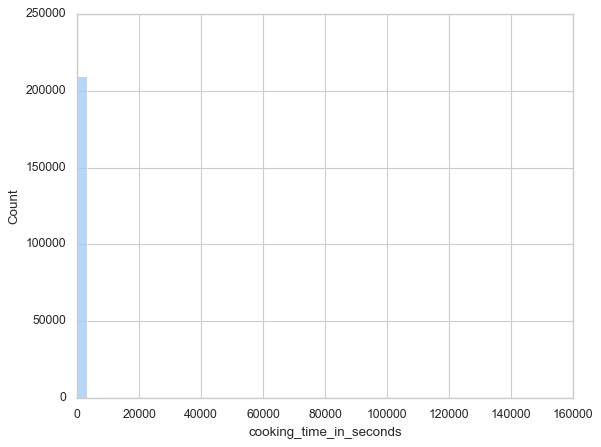

In [19]:
sns.histplot(cleaned_df, x='cooking_time_in_seconds',bins=50)

<AxesSubplot:xlabel='cooking_time_in_seconds_trf', ylabel='Count'>

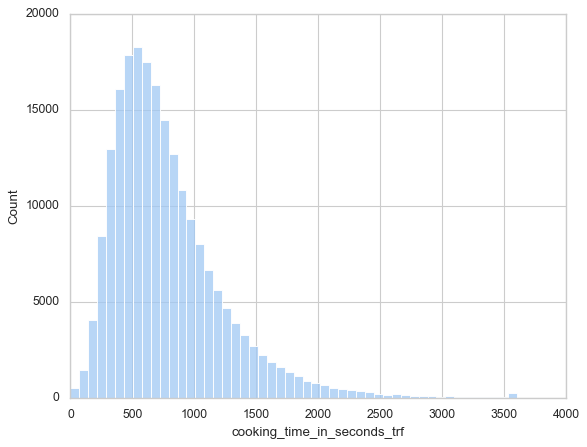

In [20]:
cleaned_df['cooking_time_in_seconds_trf'] = cleaned_df['cooking_time_in_seconds'].fillna(cleaned_df['cooking_time_in_seconds'].median())
cleaned_df['cooking_time_in_seconds_trf'] = cleaned_df['cooking_time_in_seconds'].apply(lambda time: 3600 if time > 3600 else time)

sns.histplot(cleaned_df, x='cooking_time_in_seconds_trf',bins=50)

   threshold  outlier_count        pct
0        3.0           1173  21.227621
1        3.2            924  21.428571
2        3.4            726  19.696970
3        3.6            583  22.126930
4        3.8            454  18.942731
5        4.0            368  12.771739
6        4.2            321  15.576324
7        4.4            271  15.129151
8        4.6            230  15.652174
9        4.8            194        NaN


/Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


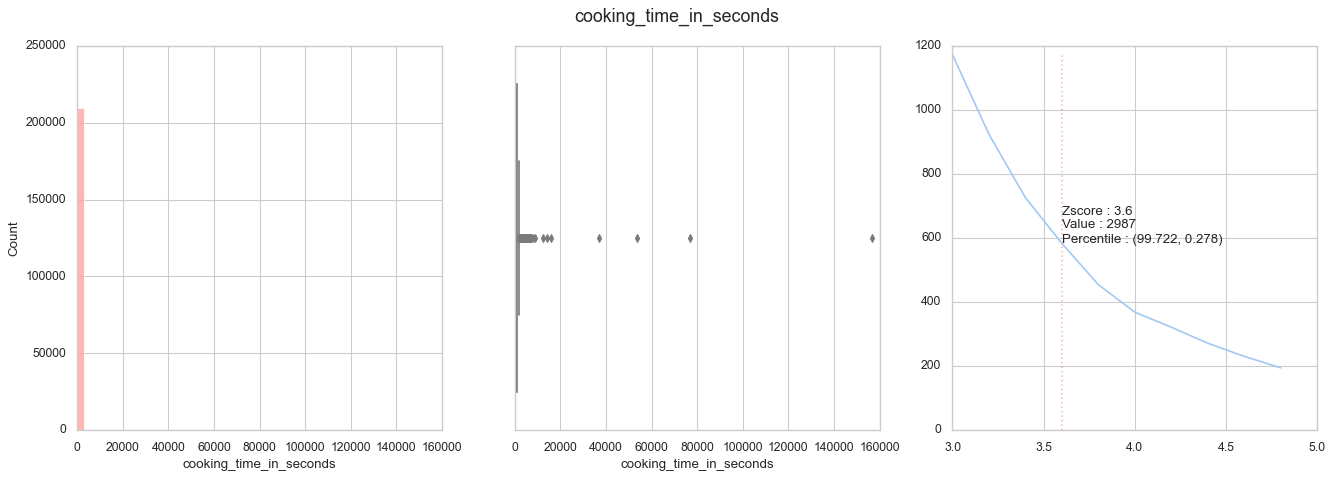

In [21]:
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.2, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.histplot(df[col], kde=False, bins = 50,color="r")
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step, print_list=True)
    plt.show()

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = (cleaned_df[col] - cleaned_df[col].mean())/cleaned_df[col].std(ddof=0)
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

outlier_inspect(cleaned_df, 'cooking_time_in_seconds', min_z=3, step=0.2)

   threshold  outlier_count        pct
0        3.0           1589  16.740088
1        3.2           1323  17.535903
2        3.4           1091  16.040330
3        3.6            916  15.502183
4        3.8            774  16.279070
5        4.0            648  15.123457
6        4.2            550  14.545455
7        4.4            470  10.638298
8        4.6            420  15.476190
9        4.8            355        NaN


/Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


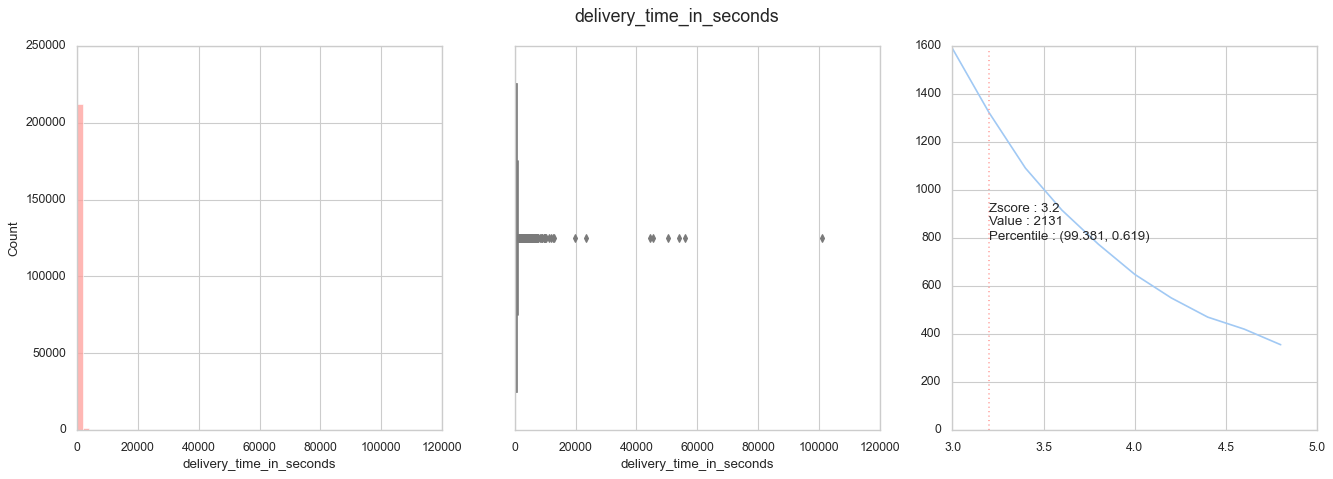

In [22]:
outlier_inspect(cleaned_df, 'delivery_time_in_seconds', min_z=3, step=0.2)

<AxesSubplot:xlabel='delivery_time_in_seconds', ylabel='Count'>

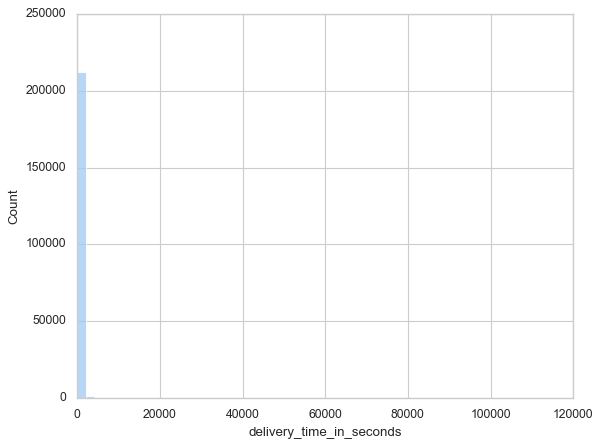

In [23]:
sns.histplot(cleaned_df, x='delivery_time_in_seconds',bins=50)

<AxesSubplot:xlabel='delivery_time_in_seconds', ylabel='Count'>

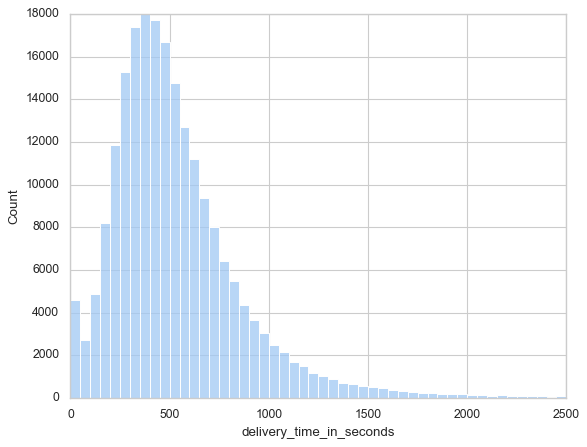

In [24]:
sns.histplot(cleaned_df[cleaned_df['delivery_time_in_seconds'] <= 2500], x='delivery_time_in_seconds',bins=50)

<AxesSubplot:xlabel='delivery_time_in_seconds_trf', ylabel='Count'>

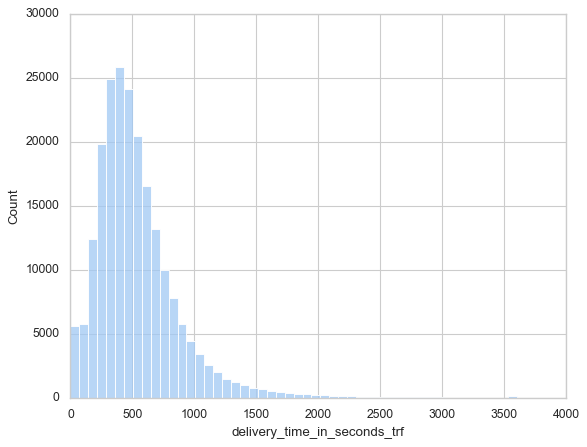

In [25]:
cleaned_df['delivery_time_in_seconds_trf'] = cleaned_df['delivery_time_in_seconds'].fillna(cleaned_df['delivery_time_in_seconds'].median())
cleaned_df['delivery_time_in_seconds_trf'] = cleaned_df['delivery_time_in_seconds'].apply(lambda time: 3600 if time > 3600 else time)

sns.histplot(cleaned_df, x='delivery_time_in_seconds_trf',bins=50)

In [26]:
cleaned_df['hrs_index'] = cleaned_df[['order_date','order_hour']].apply(lambda x: (x.order_date-1)*24 + x.order_hour, axis=1)
cleaned_df['week_index'] = np.floor(cleaned_df['order_date']/7) + 1

In [27]:
cleaned_df['order_date_of_month'] = cleaned_df['order_date'].mod(31) + 1

In [616]:
cleaned_df['total_time_waiting'] = cleaned_df['cooking_time_in_seconds_trf'] + cleaned_df['delivery_time_in_seconds_trf']

In [618]:
agg_dict = {'delivery_status':'count',
            'delivery_fee':'median',
            'restaurant_id':pd.Series.nunique,
            'food_price':'median',
            'is_coupon_used':'sum',
            'is_bkk':'sum',
            'is_chain_res':'sum',
            'is_main_dish':'sum',
            'CASH':'sum',
            'LINEMAN_CREDIT_CARD':'sum',
            'RLP':'sum',
            'L':'sum',
            'M':'sum',
            'S':'sum',
            'cooking_time_in_seconds_trf':'median',
            'delivery_time_in_seconds_trf':'median',
            'total_time_waiting':'median'
          }

hourly = cleaned_df.groupby(['hrs_index','order_hour','order_date_of_month','dow'])\
          .agg(agg_dict)\
          .reset_index()\
          .set_index('hrs_index')

hourly.rename(columns={'delivery_status':'orders'}, inplace=True)

daily = cleaned_df.groupby(['order_date','order_date_of_month','dow'])\
          .agg(agg_dict)\
          .reset_index()\
          .set_index('order_date')

daily.rename(columns={'delivery_status':'orders'}, inplace=True)

weekly = cleaned_df[cleaned_df['order_date'] <= 363]\
          .groupby(['week_index'])\
          .agg(agg_dict)\
          .reset_index()\
          .set_index('week_index')

weekly.rename(columns={'delivery_status':'orders'}, inplace=True)

In [619]:
hourly

,order_hour,order_date_of_month,dow,orders,delivery_fee,restaurant_id,food_price,is_coupon_used,is_bkk,is_chain_res,is_main_dish,CASH,LINEMAN_CREDIT_CARD,RLP,L,M,S,cooking_time_in_seconds_trf,delivery_time_in_seconds_trf,total_time_waiting
hrs_index,,,,,,,,,,,,,,,,,,,,
7,7,2,1,2,5.0,2,115.0,0,1,1,1,1,0,1,1,0,1,664.0,420.5,1084.5
8,8,2,1,9,0.0,6,80.0,0,5,2,6,7,0,2,1,1,7,541.0,538.0,1214.0
9,9,2,1,10,0.0,8,125.0,0,3,1,6,10,0,0,0,2,8,758.0,373.0,1026.0
10,10,2,1,22,10.0,15,120.0,2,11,4,17,21,0,1,9,5,8,629.0,638.5,1221.5
11,11,2,1,46,10.0,26,119.0,5,21,6,38,42,0,4,16,15,15,755.0,522.0,1331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,18,25,1,96,0.0,49,162.5,93,42,15,85,75,15,6,33,26,37,663.0,457.5,1165.0
8755,19,25,1,97,0.0,50,130.0,95,35,6,79,72,19,6,31,30,36,673.5,449.0,1155.0
8756,20,25,1,61,0.0,30,150.0,58,31,3,55,47,8,6,18,9,34,634.0,370.0,1052.0


In [620]:
daily['%_coupon_used'] = daily['is_coupon_used']/daily['orders']
daily['%_chain_res'] = daily['is_chain_res']/daily['orders']
daily['%_S_resturant_orders'] = daily['S']/daily['orders']
daily['%_L_resturant_orders'] = daily['L']/daily['orders']
daily['orders_per_rest'] = daily['orders']/daily['restaurant_id']

daily['%_CASH'] = daily['CASH']/daily['orders']
hourly['%_coupon_used'] = hourly['is_coupon_used']/hourly['orders']

<AxesSubplot:>

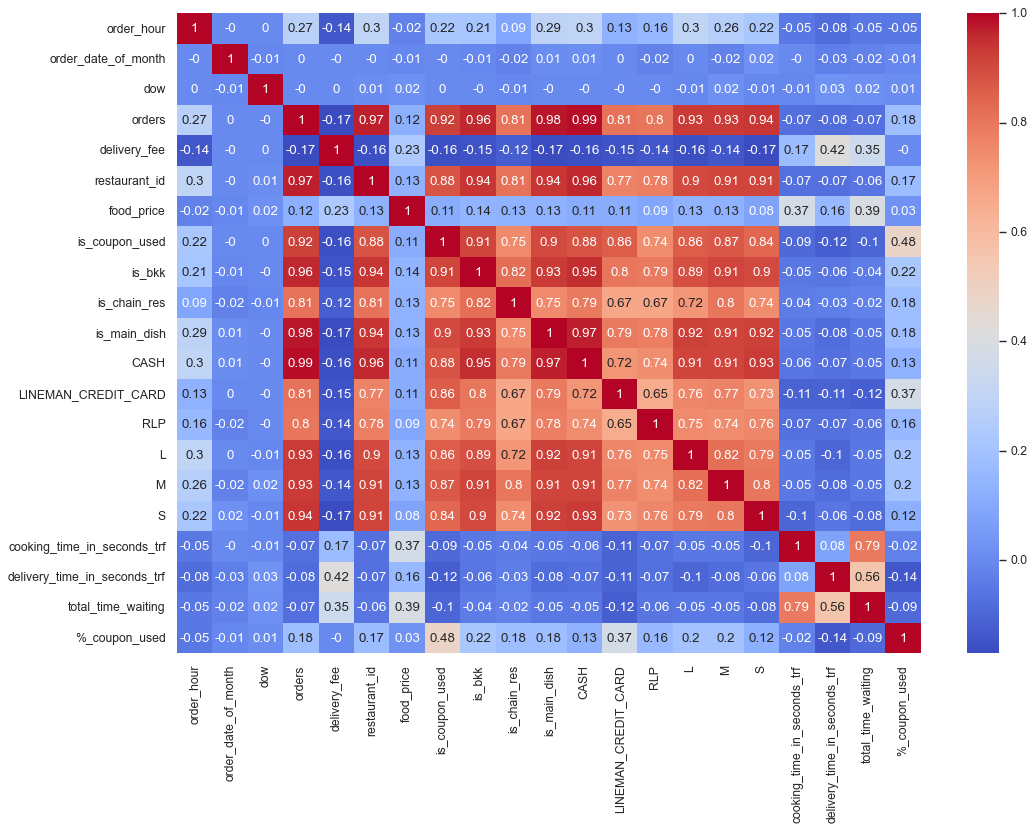

In [621]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(np.round(hourly.corr(),2), cmap="coolwarm", annot=True)

<AxesSubplot:>

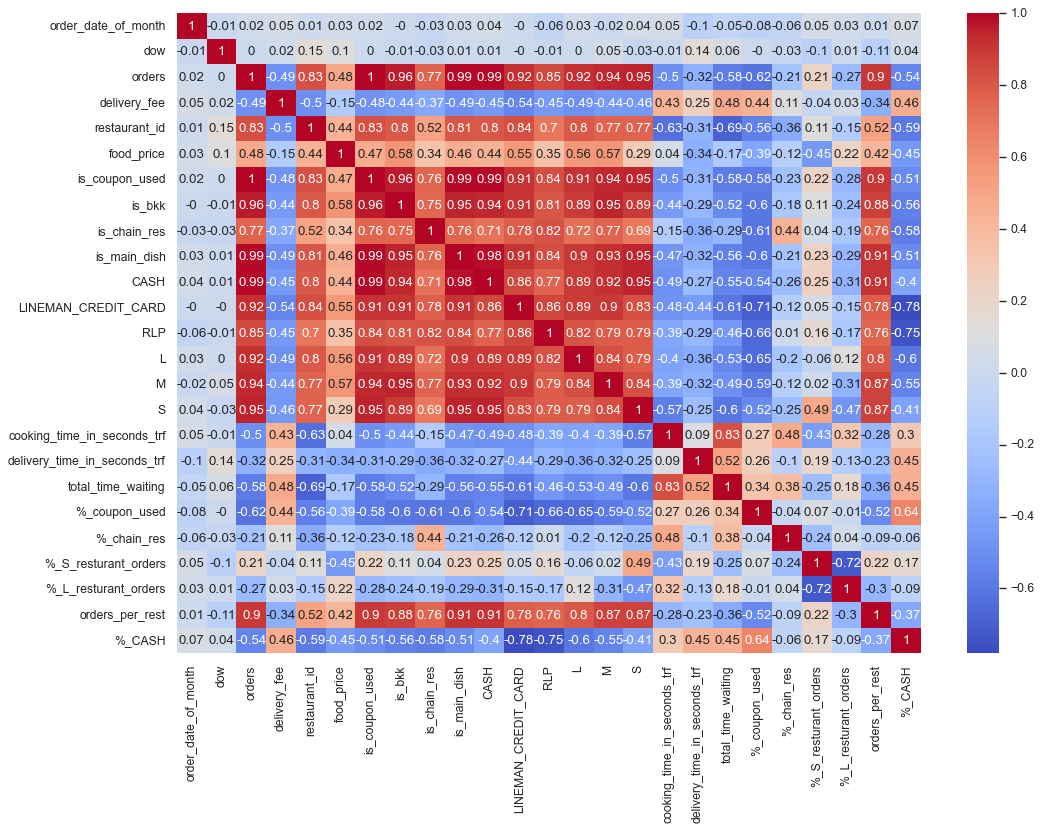

In [622]:
sns.heatmap(np.round(daily[95:].corr(),2), cmap="coolwarm", annot=True)

<AxesSubplot:>

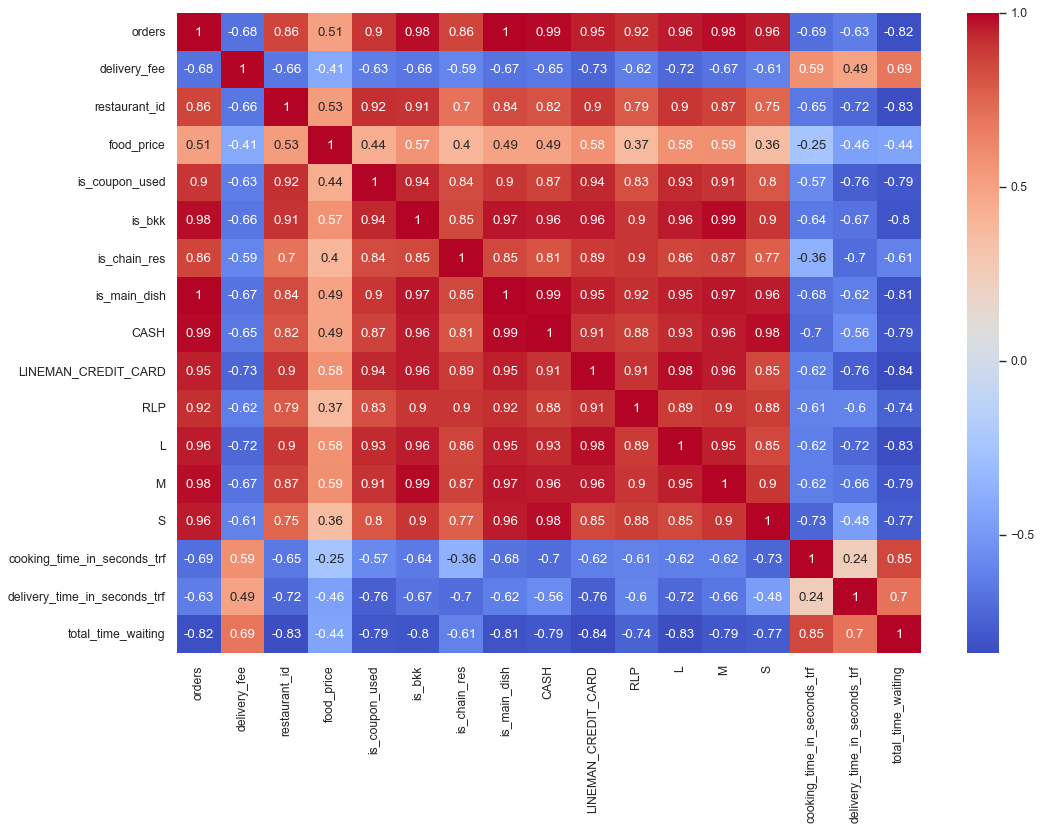

In [739]:
sns.heatmap(np.round(weekly.corr(),2), cmap="coolwarm", annot=True)

array([<AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>], dtype=object)

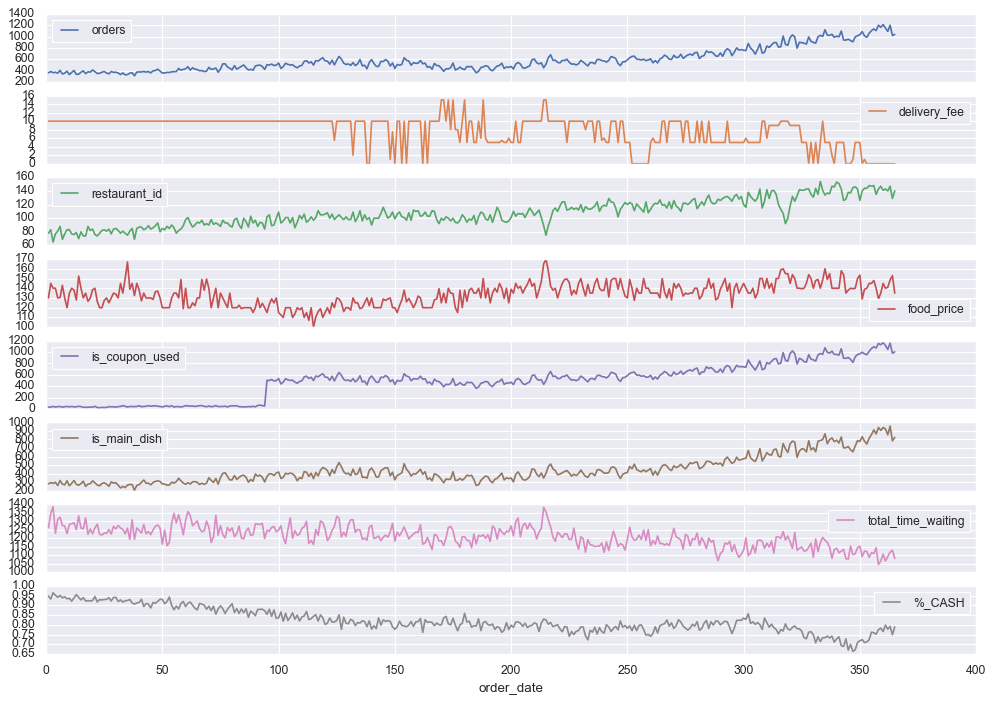

In [623]:
daily[['orders','delivery_fee','restaurant_id','food_price','is_coupon_used','is_main_dish','total_time_waiting','%_CASH']].plot(subplots=True)

array([<AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>,
       <AxesSubplot:xlabel='order_date'>], dtype=object)

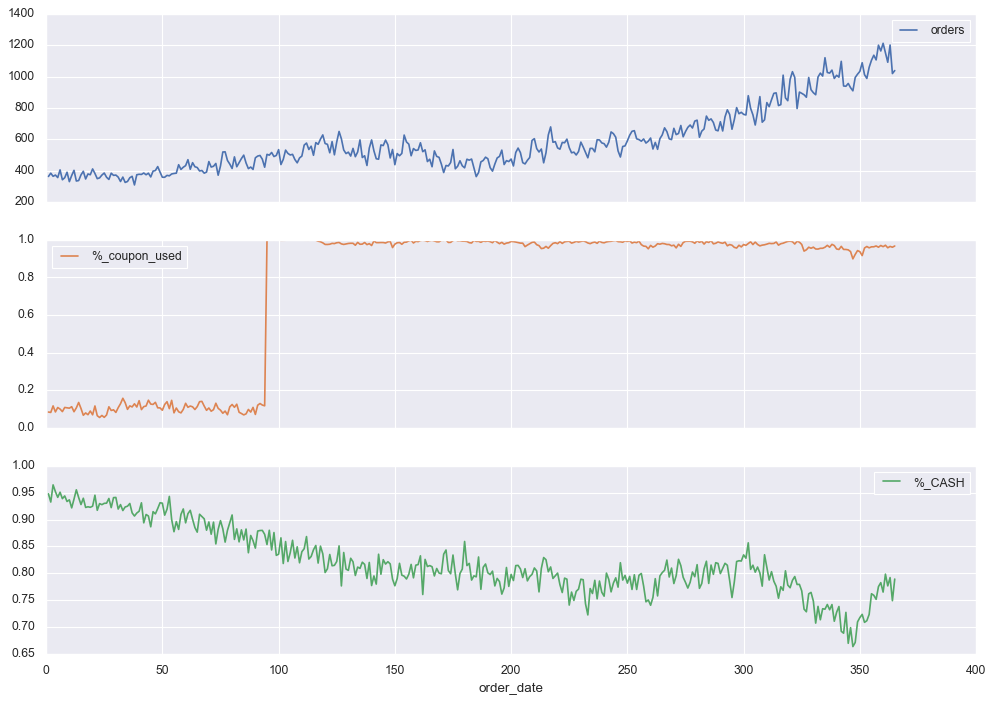

In [624]:
daily[['orders','%_coupon_used','%_CASH']].plot(subplots=True)

array([<AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>,
       <AxesSubplot:xlabel='week_index'>], dtype=object)

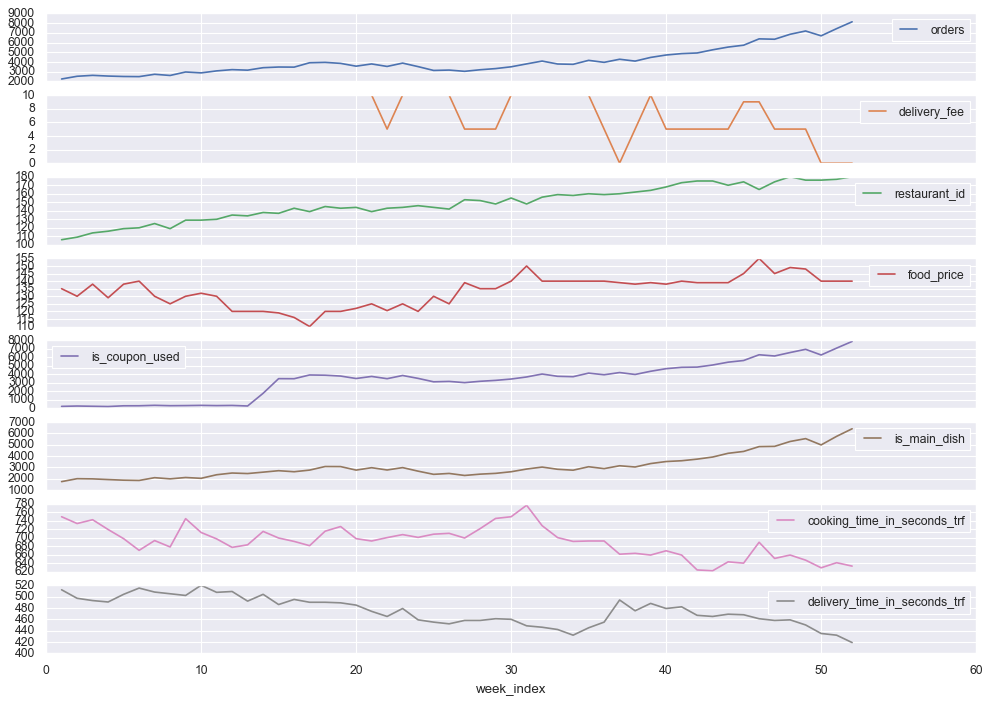

In [625]:
weekly[['orders','delivery_fee','restaurant_id','food_price','is_coupon_used','is_main_dish','cooking_time_in_seconds_trf','delivery_time_in_seconds_trf']].plot(subplots=True)

array([<AxesSubplot:xlabel='hrs_index'>, <AxesSubplot:xlabel='hrs_index'>,
       <AxesSubplot:xlabel='hrs_index'>, <AxesSubplot:xlabel='hrs_index'>,
       <AxesSubplot:xlabel='hrs_index'>, <AxesSubplot:xlabel='hrs_index'>,
       <AxesSubplot:xlabel='hrs_index'>], dtype=object)

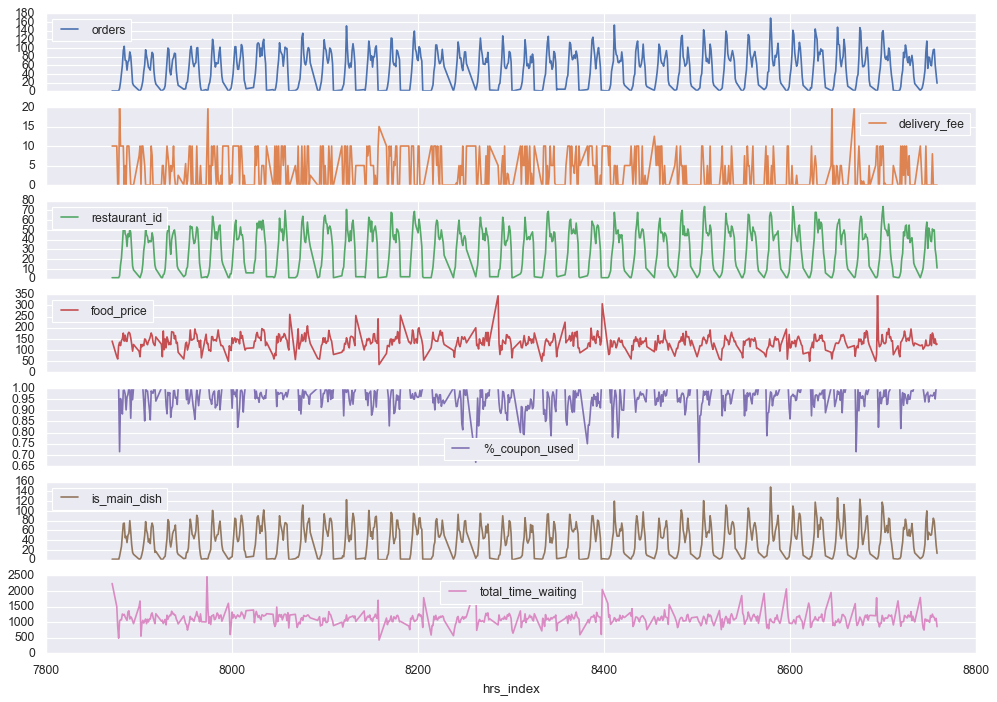

In [738]:
hourly[6500:][['orders','delivery_fee','restaurant_id','food_price','%_coupon_used','is_main_dish','total_time_waiting']].plot(subplots=True)

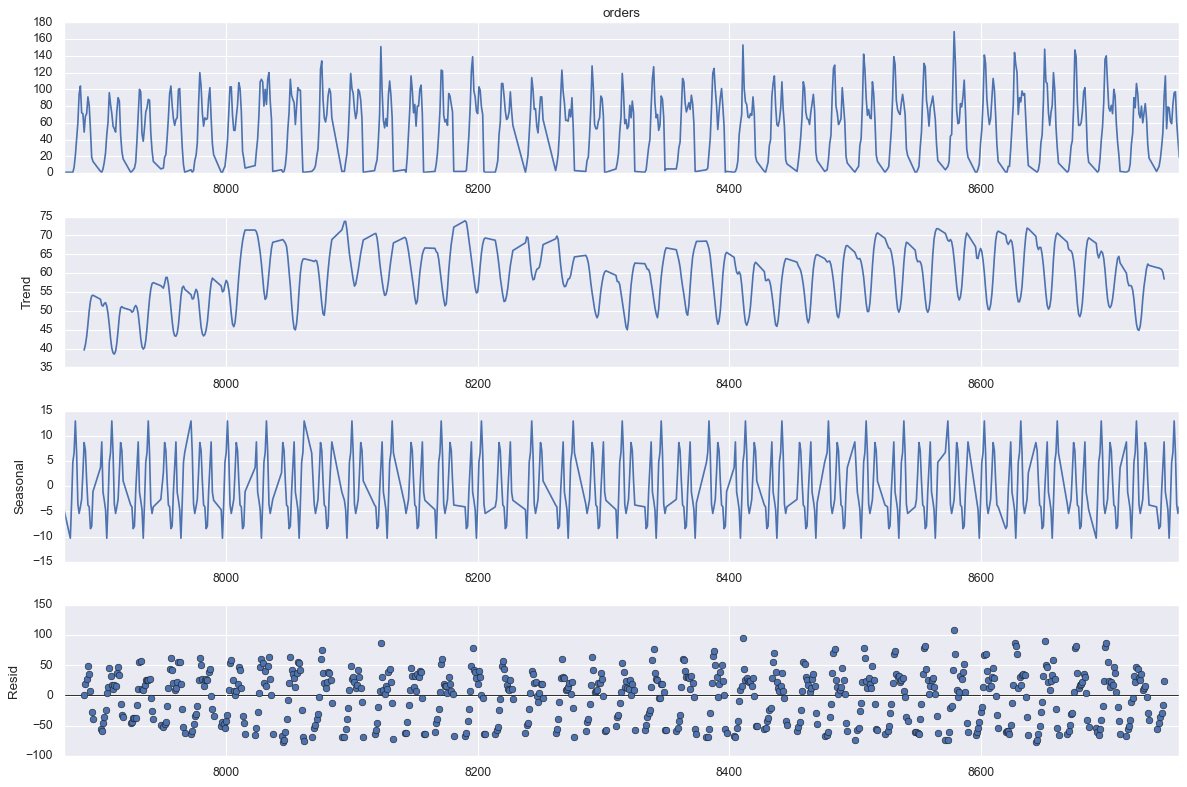

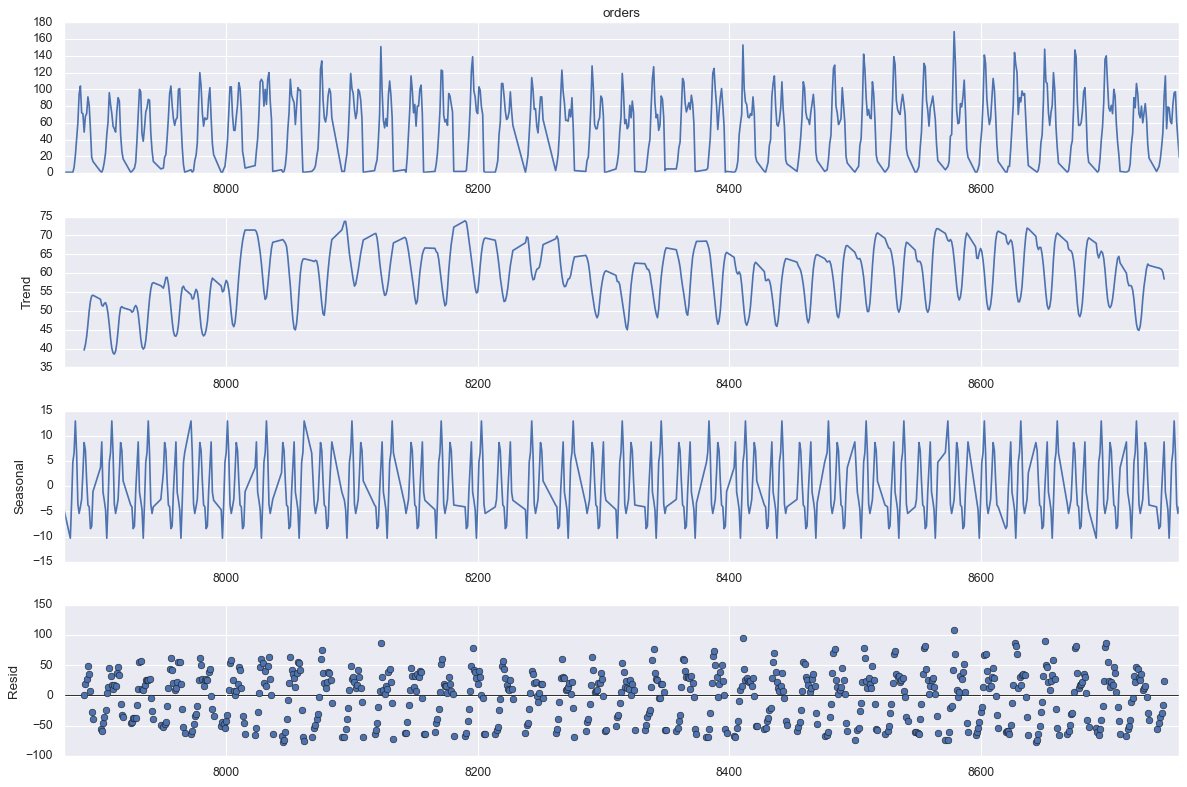

In [736]:
from statsmodels.tsa.seasonal import seasonal_decompose

orders_trunc = hourly[6500:]['orders']
# orders_inter = orders_after_hr6500.fillna(orders_after_hr6500.interpolate())

result = seasonal_decompose(orders_trunc, period=24)
result.plot()

/Users/pondspective/opt/miniconda3/envs/tsf/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


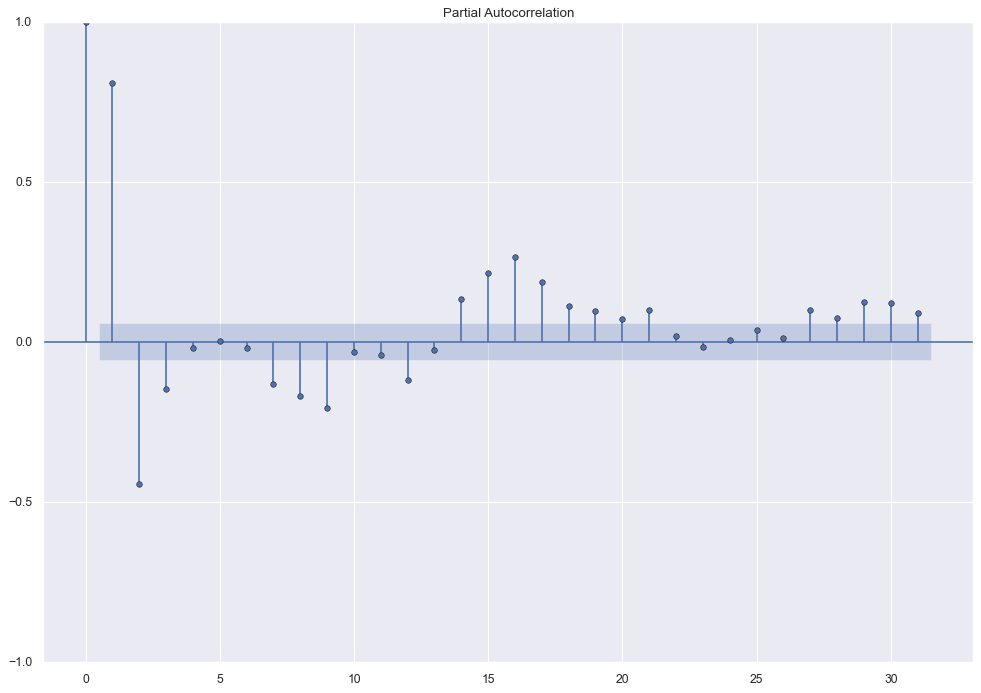

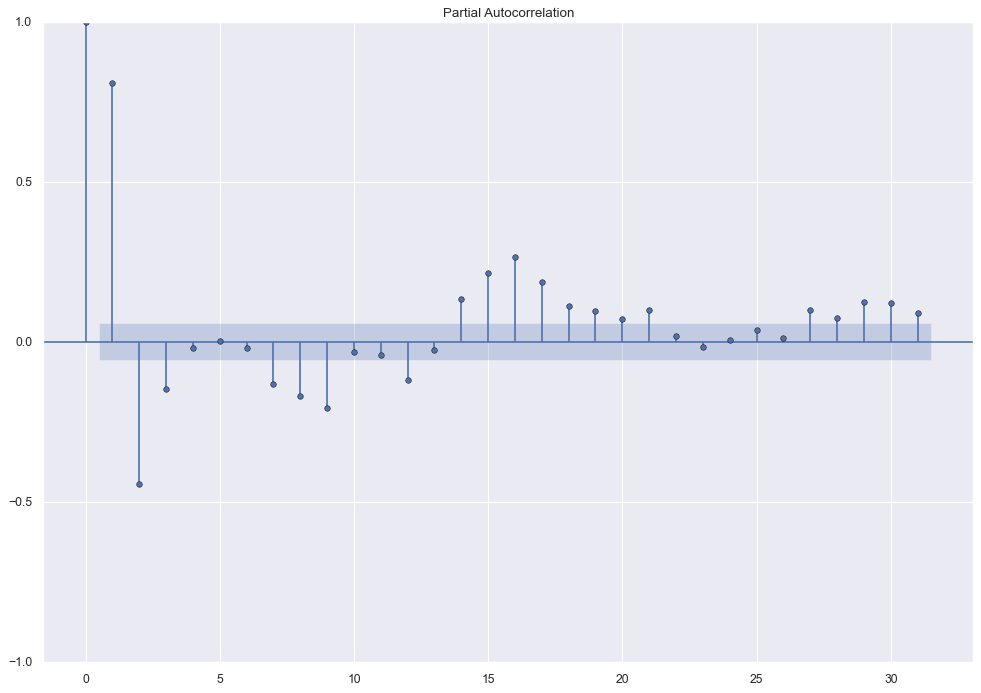

In [628]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(orders_trunc)

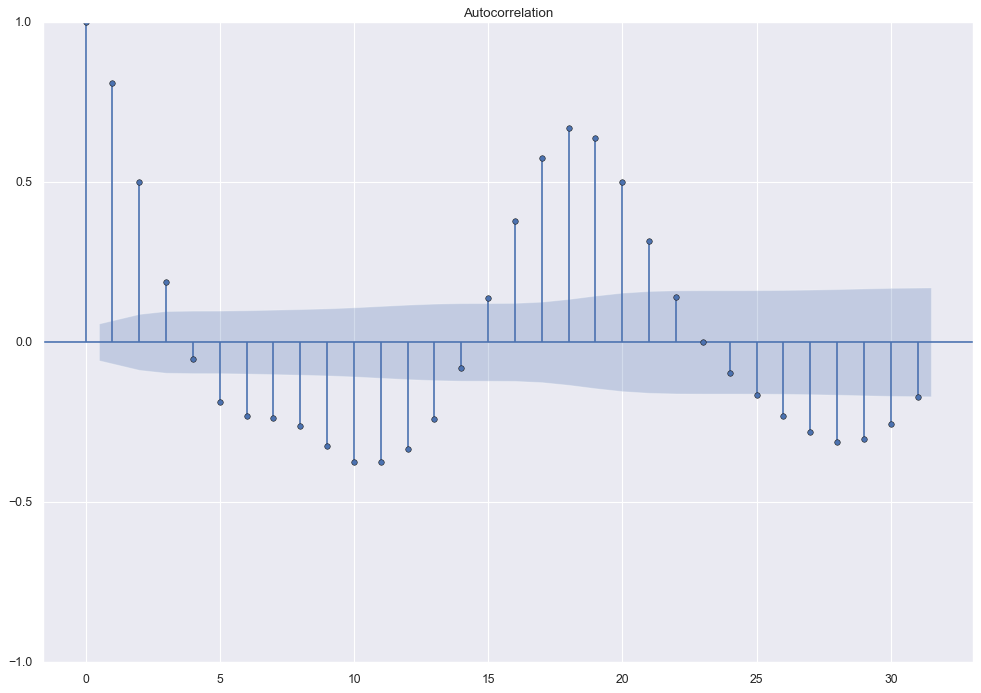

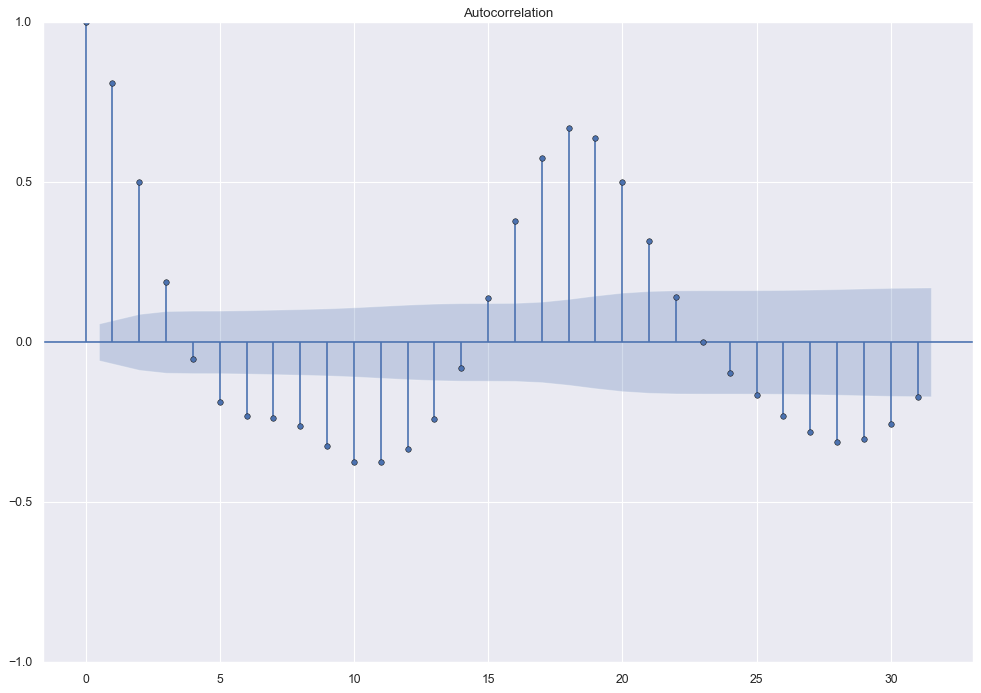

In [629]:
plot_acf(orders_trunc)

<AxesSubplot:xlabel='order_hour'>

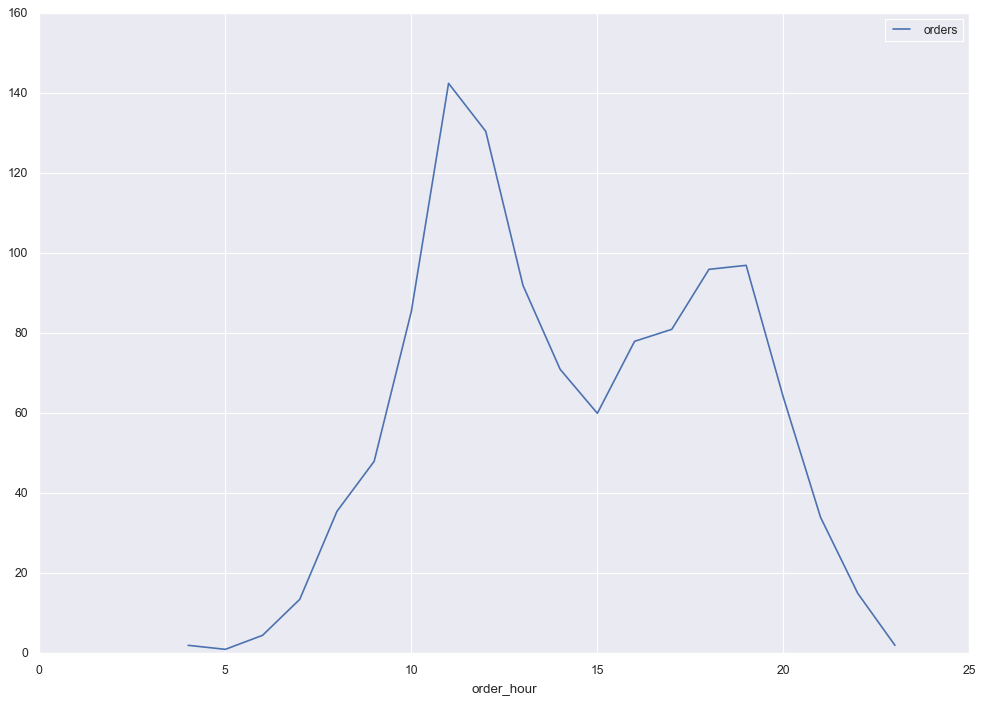

In [630]:
hourly[7000:].groupby(['order_hour']).agg({'orders':'median'}).plot()

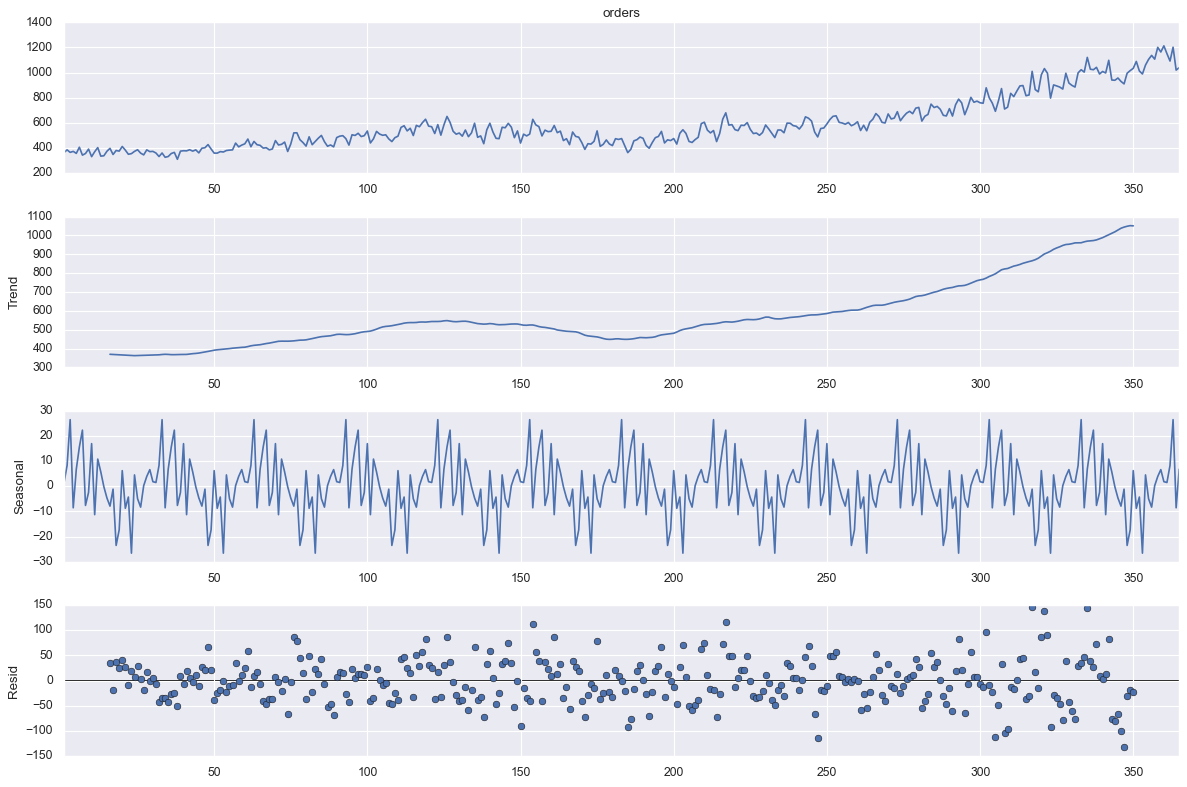

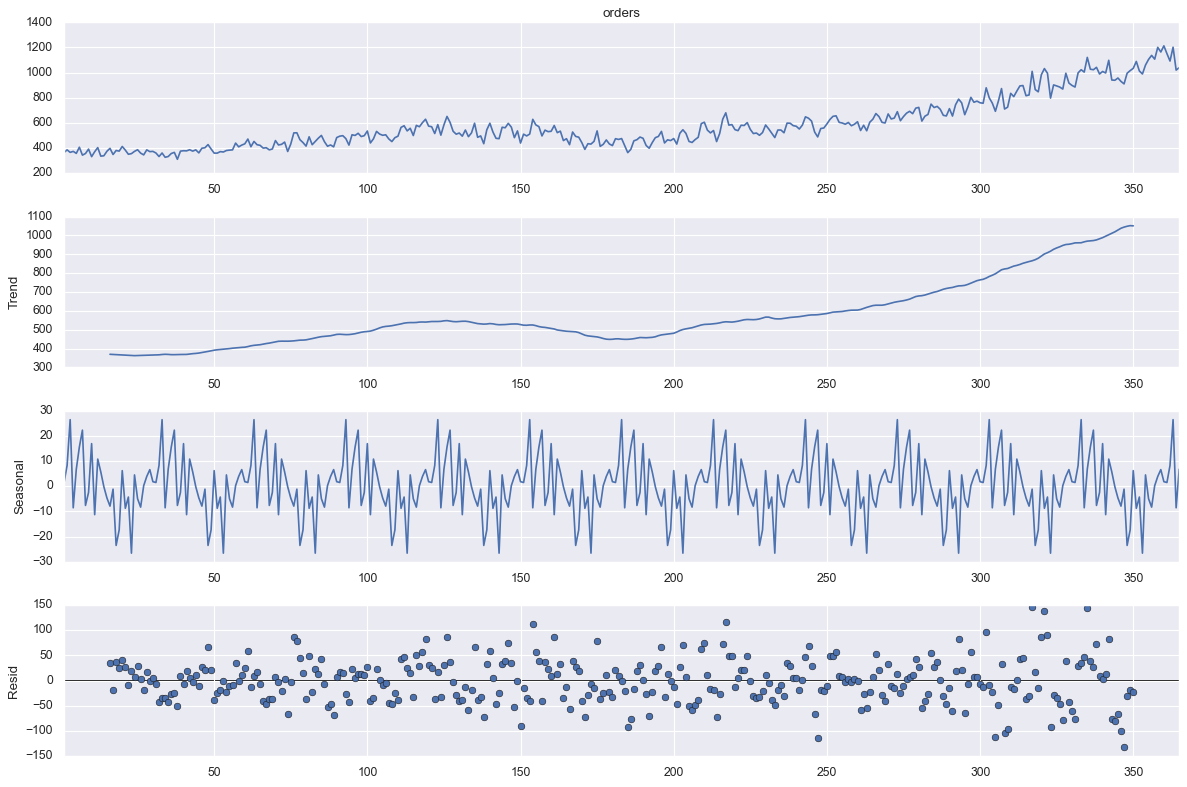

In [631]:
result = seasonal_decompose(daily['orders'], period=30)
result.plot()

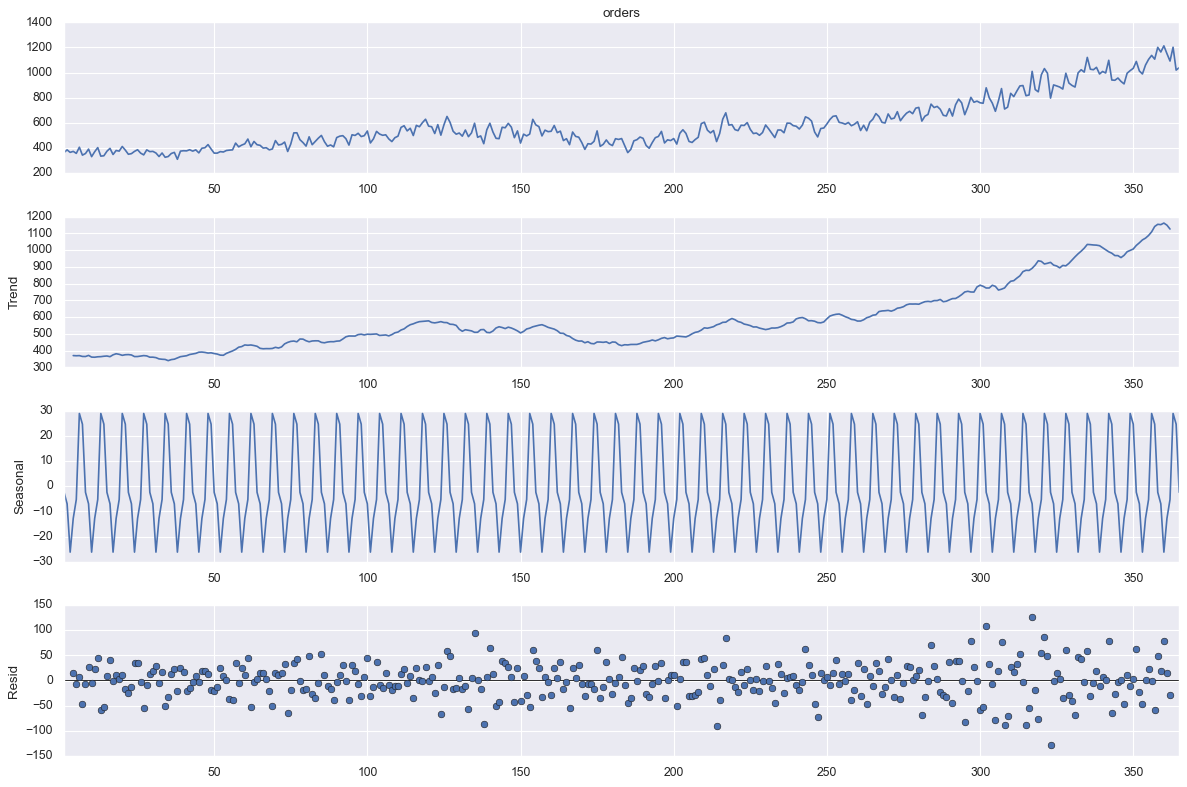

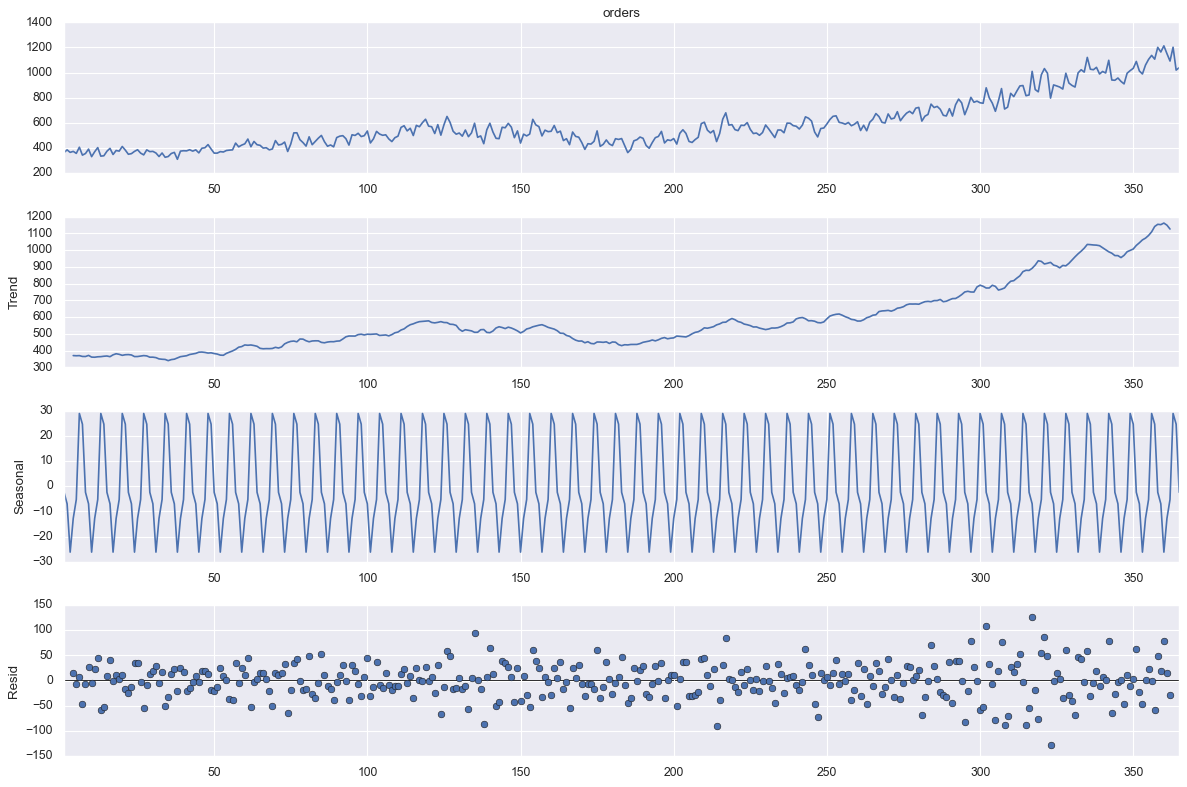

In [632]:
result = seasonal_decompose(daily['orders'], period=7)
result.plot()

# Approach 1 : LSTM Model (Multivariable Forcast)

In [1212]:
# ['orders','delivery_fee','food_price','%_CASH','cooking_time_in_seconds_trf','delivery_time_in_seconds_trf']

sel_feat = ['orders','delivery_fee','food_price','%_CASH','%_coupon_used','total_time_waiting'] # ,'cooking_time_in_seconds_trf','delivery_time_in_seconds_trf'
daily[sel_feat].tail(15)

,orders,delivery_fee,food_price,%_CASH,%_coupon_used,total_time_waiting
order_date,,,,,,
351,1089,0.0,129.0,0.723600,0.916437,1092.0
352,1013,1.0,139.0,0.708786,0.956565,1124.5
353,989,0.0,140.0,0.711830,0.964611,1122.0
354,1060,0.0,145.0,0.723585,0.957547,1087.0
355,1105,0.0,145.0,0.761991,0.962896,1114.5
356,1137,0.0,148.0,0.759015,0.963061,1110.0
357,1107,0.0,140.0,0.751581,0.967480,1144.0
358,1201,0.0,129.0,0.775187,0.960866,1046.0
359,1164,0.0,135.0,0.782646,0.969931,1066.5


In [1213]:
from sklearn.preprocessing import StandardScaler
df_for_training = daily[95:][sel_feat].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [1214]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 28   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]]) 
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (183, 60, 6).
trainY shape == (183, 1).


In [1215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout


# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_159 (LSTM)             (None, 60, 64)            18176     
                                                                 
 lstm_160 (LSTM)             (None, 32)                12416     
                                                                 
 dropout_78 (Dropout)        (None, 32)                0         
                                                                 
 dense_78 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
5/5 [==============================] - 2s 78ms/step - loss: 0.5029 - val_loss: 3.7530
Epoch 2/100
5/5 [==============================] - 0s 33ms/step - loss: 0.3908 - val_loss: 3.0748
Epoch 3/100
5/5 [==============================] - 0s 42ms/step - loss: 0.2948 - val_loss: 2.0731
Epoch 4/100
5/5 [==============================] - 0s 30ms/step - loss: 0.2038 - val_loss: 0.3109
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.1599 - val_loss: 186.1192
Epoch 6/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1459 - val_loss: 1.2481
Epoch 7/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1266 - val_loss: 0.9608
Epoch 8/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1236 - val_loss: 7.7084
Epoch 9/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1007 - val_loss: 17.6112
Epoch 10/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0966 - val_loss: 4.4658
Epoch 11/100
5/5

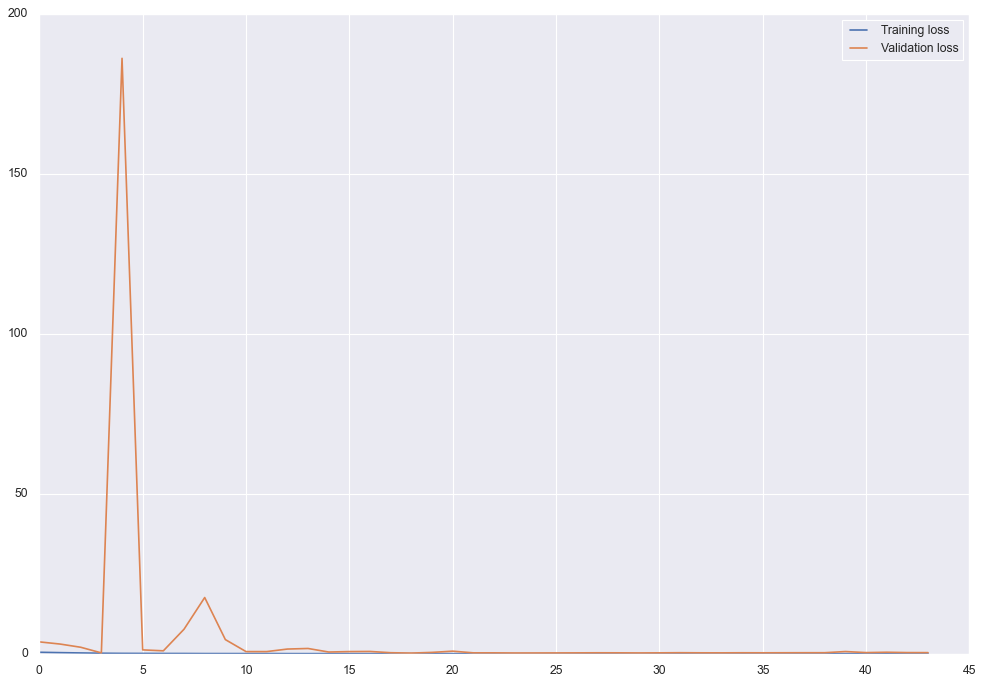

In [1216]:
import tensorflow as tf

# fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[callback])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [1280]:
# n_past = 16
n_days_for_prediction=45 #let us predict past 15 days

prediction = model.predict(trainX[-n_days_for_prediction:])

2/2 [==============================] - 0s 6ms/step


In [1281]:
prediction

array([[1.4893118],
       [1.5000886],
       [1.4286349],
       [1.3662397],
       [1.3610098],
       [1.3992501],
       [1.4494272],
       [1.5571388],
       [1.6154336],
       [1.7919194],
       [1.9469166],
       [2.0411751],
       [2.1209986],
       [2.147576 ],
       [2.165645 ],
       [2.1173995],
       [2.1206486],
       [2.1579187],
       [2.151511 ],
       [2.1702268],
       [2.1831348],
       [2.2117333],
       [2.1497128],
       [2.1317842],
       [2.132005 ],
       [2.1580899],
       [2.167869 ],
       [2.195365 ],
       [2.3012617],
       [2.3464992],
       [2.3851993],
       [2.4331582],
       [2.417651 ],
       [2.2495859],
       [2.072829 ],
       [1.9744431],
       [1.864649 ],
       [1.7725133],
       [1.6326171],
       [1.5307328],
       [1.4200944],
       [1.3650106],
       [1.372785 ],
       [1.3904754],
       [1.4125768]], dtype=float32)

In [1282]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [1283]:
daily[-n_past:].index.to_list()

[306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365]

In [1284]:
y_pred_future

array([ 947.258  ,  949.4005 ,  935.1946 ,  922.7896 ,  921.7498 ,
        929.35254,  939.32837,  960.74286,  972.33264, 1007.4204 ,
       1038.2358 , 1056.9757 , 1072.8457 , 1078.1296 , 1081.722  ,
       1072.1301 , 1072.7761 , 1080.1859 , 1078.912  , 1082.6329 ,
       1085.1992 , 1090.885  , 1078.5544 , 1074.99   , 1075.0339 ,
       1080.22   , 1082.1642 , 1087.6307 , 1108.6844 , 1117.6782 ,
       1125.3723 , 1134.9072 , 1131.8242 , 1098.4106 , 1063.2689 ,
       1043.7085 , 1021.88   , 1003.5622 ,  975.74896,  955.493  ,
        933.49664,  922.5452 ,  924.0909 ,  927.608  ,  932.002  ],
      dtype=float32)

In [1285]:
original_df = daily['orders']
forecast_df = pd.DataFrame(data={'orders':y_pred_future}, index=daily[-n_days_for_prediction:].index.to_list())
forecast_df

,orders
321,947.257996
322,949.400513
323,935.194580
324,922.789612
325,921.749817
326,929.352539
327,939.328369
328,960.742859
329,972.332642
330,1007.420410


<AxesSubplot:xlabel='order_date', ylabel='orders'>

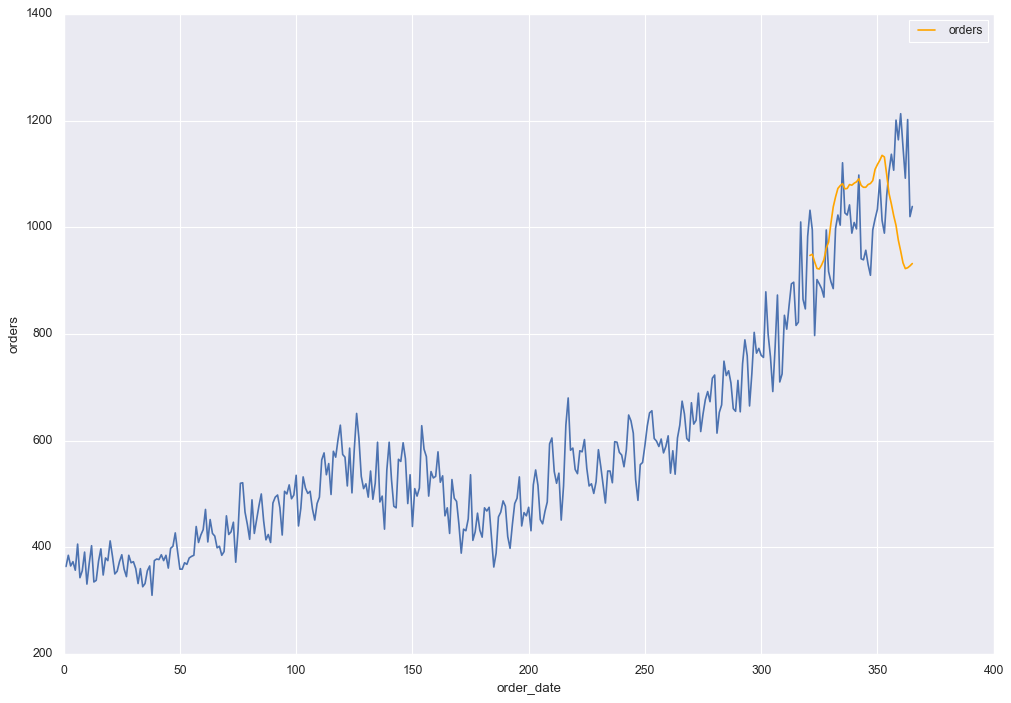

In [1286]:
sns.lineplot(data = original_df)
sns.lineplot(data = forecast_df, palette=['orange'])

In [1287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mean_absolute_error(original_df[-n_days_for_prediction:].to_list(), forecast_df['orders'].to_list())

98.8499728732639

In [1288]:
np.sqrt(mean_squared_error(original_df[-n_days_for_prediction:].to_list(), forecast_df['orders'].to_list()))

116.80159646721928